## Filtro passa-baixa


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.fftpack import fft, fftshift
from suaBibSignal import *
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
import soundfile   as sf

ModuleNotFoundError: No module named 'suaBibSignal'

In [ ]:
def calcFFT(signal, fs):
    # https://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html
    #y  = np.append(signal, np.zeros(len(signal)*fs))
    N  = len(signal)
    T  = 1/fs
    xf = np.linspace(-1.0/(2.0*T), 1.0/(2.0*T), N)
    yf = fft(signal)
    return(xf, fftshift(yf))


In [4]:
def LPF(signal, cutoff_hz, fs):
        from scipy import signal as sg
        #####################
        # Filtro
        #####################
        # https://scipy.github.io/old-wiki/pages/Cookbook/FIRFilter.html
        nyq_rate = fs/2
        width = 5.0/nyq_rate
        ripple_db = 60.0 #dB
        N , beta = sg.kaiserord(ripple_db, width)
        taps = sg.firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))
        return( sg.lfilter(taps, 1.0, signal))

In [5]:
#leituara do arquivo audio
fs = 44100   # taxqa de amostagem (sample rate)
sd.default.samplerate = fs
sd.default.channels = 1
audio, samplerate = sf.read('camFis.wav')
yAudio = audio[:,1]
samplesAudio = len(yAudio)
sd.play(audio)
sd.wait()


Text(0.5,1,'Oi no tempo')

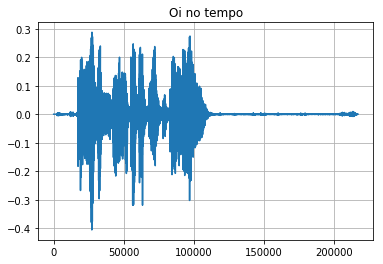

In [19]:
plt.plot(yAudio)
plt.grid()
plt.title('Oi no tempo')

(0, 600)

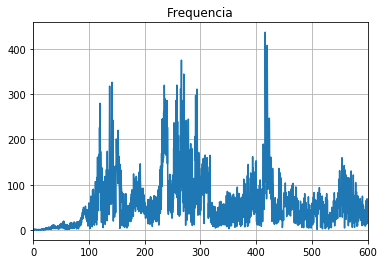

In [20]:
X, Y = calcFFT(yAudio, samplerate)
plt.figure("Fourier Audio")
plt.plot(X, np.abs(Y))
plt.grid()
plt.title('Frequencia')
plt.xlim(0,600)

filtrado


Text(0.5,1,'Filtrado no tempo')

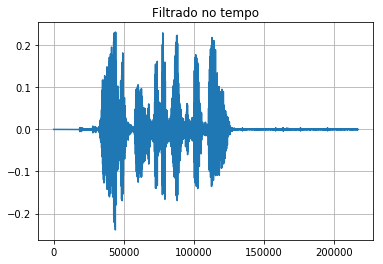

In [21]:
yFiltrado = LPF(yAudio, 800, fs)
print("filtrado")
sd.play(yFiltrado)
sd.wait()
plt.plot(yFiltrado)
plt.grid()
plt.title('Filtrado no tempo')

(0, 1500)

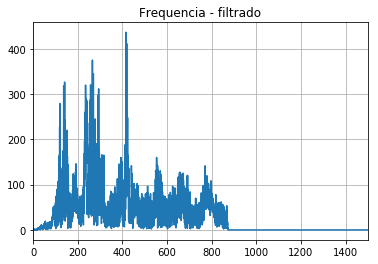

In [22]:
X, YF = calcFFT(yFiltrado, samplerate)
plt.figure("Fourier Audio filtrado")
plt.plot(X, np.abs(YF))
plt.grid()
plt.title('Frequencia - filtrado')
plt.xlim(0,1500)